<a href="https://colab.research.google.com/github/luizthompson/MVP_An-lise-de-Dados-e-Boas-Pr-ticas_Historic-US-Election-Results/blob/main/MVP_Historic_US_Election.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP Análise de Dados e Boas Práticas
Luiz Guilherme Thompson Vaz



# 1. Definição do Problema

Eu decidi analisar os resultados das eleições presidenciais dos Estados Unidos entre 1976 e 2020. O objetivo desta análise é explorar os padrões eleitorais dos diferentes estados e identificar tendências históricas, além de verificar se eventos significativos influenciaram os resultados em determinados períodos.

Os dados incluem os resultados de cada estado, o número de votos recebidos pelos candidatos, o total de votos em cada estado e a afiliação partidária dos candidatos. Meu foco será entender a dinâmica entre os principais partidos (Republicano e Democrata), observando se há variações significativas entre os estados e ao longo dos anos.


# 1.1 Descrição do Problema

Neste projeto, o objetivo é analisar os resultados das eleições presidenciais dos Estados Unidos entre 1976 e 2020. O foco da análise está em explorar os padrões eleitorais nos diferentes estados, observando como os votos para os candidatos variaram ao longo do tempo. Pretendemos identificar tendências históricas e regionais, além de verificar se há eventos significativos que possam ter influenciado os resultados de determinadas eleições.

# 1.2 Tipo de problema

Este é um problema de **análise exploratória de dados**, sem o objetivo de criar um modelo preditivo. Estou lidando com **aprendizado não supervisionado**, onde uso gráficos e técnicas estatísticas para entender o comportamento dos dados.




# 1.3 Premissas ou hipóteses


1. A maioria dos estados tende a votar consistentemente em um dos dois partidos principais: Republicano ou Democrata.
2. Candidatos de partidos menores têm pouca influência no resultado final.
3. Eventos históricos, como crises econômicas, podem ter influenciado as eleições.



# 1.4 Restrições ou condições

Os dados são limitados aos resultados das eleições presidenciais entre 1976 e 2020, sem incluir dados demográficos ou detalhes mais profundos dos eleitores.


# 1.5 Definição dos atributos do dataset



### Atributos do Dataset:
- `year`: Ano da eleição.
- `state`: Estado onde a eleição ocorreu.
- `candidate`: Nome do candidato.
- `party_simplified`: Partido principal (Republicano, Democrata, etc.).
- `candidatevotes`: Número de votos recebidos pelo candidato.
- `totalvotes`: Total de votos no estado.
- `party_detailed`: Detalhe mais específico sobre o partido do candidato.
- `candidatevotes_percent`: Percentual de votos que o candidato recebeu.

Com essa definição clara, sigo agora para a análise exploratória dos dados e as etapas de pré-processamento.


# 2. Análise de Dados

# 2.1 Estatísticas Descritivas




### Estatísticas Descritivas

Nesta etapa, vou analisar as estatísticas descritivas do dataset. Isso me ajudará a entender o número de atributos, as instâncias presentes e se há valores faltantes. Também vou verificar as primeiras linhas do dataset para ter uma ideia geral da estrutura dos dados.





In [1]:
# Importando bibliotecas necessárias
import pandas as pd

# Carregando os dados
url = 'https://raw.githubusercontent.com/luizthompson/MVP_An-lise-de-Dados-e-Boas-Pr-ticas_Historic-US-Election-Results/main/1976-2020-president.csv'
df = pd.read_csv(url)

# Verificando o número de atributos e instâncias
print(f"Número de atributos: {df.shape[1]}")
print(f"Número de instâncias: {df.shape[0]}")

# Visualizando as primeiras linhas
df.head()

# Verificando os tipos de dados
df.info()

# Verificando valores faltantes
df.isnull().sum()

# Estatísticas descritivas dos atributos numéricos
df.describe()

Número de atributos: 15
Número de instâncias: 4287
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              4287 non-null   int64  
 1   state             4287 non-null   object 
 2   state_po          4287 non-null   object 
 3   state_fips        4287 non-null   int64  
 4   state_cen         4287 non-null   int64  
 5   state_ic          4287 non-null   int64  
 6   office            4287 non-null   object 
 7   candidate         4000 non-null   object 
 8   party_detailed    3831 non-null   object 
 9   writein           4284 non-null   object 
 10  candidatevotes    4287 non-null   int64  
 11  totalvotes        4287 non-null   int64  
 12  version           4287 non-null   int64  
 13  notes             0 non-null      float64
 14  party_simplified  4287 non-null   object 
dtypes: float64(1), int64(7), object(7)
mem

,year,state_fips,state_cen,state_ic,candidatevotes,totalvotes,version,notes
count,4287.000000,4287.000000,4287.000000,4287.000000,4.287000e+03,4.287000e+03,4287.0,0.0
mean,1999.080942,28.616982,53.665034,39.754840,3.119076e+05,2.366924e+06,20210113.0,NaN
std,14.220014,15.616459,26.029189,22.772216,7.648011e+05,2.465008e+06,0.0,NaN
min,1976.000000,1.000000,11.000000,1.000000,0.000000e+00,1.235740e+05,20210113.0,NaN
25%,1988.000000,16.000000,33.000000,22.000000,1.177000e+03,6.522740e+05,20210113.0,NaN
50%,2000.000000,28.000000,53.000000,42.000000,7.499000e+03,1.569180e+06,20210113.0,NaN
75%,2012.000000,41.000000,81.000000,61.000000,1.992415e+05,3.033118e+06,20210113.0,NaN
max,2020.000000,56.000000,95.000000,82.000000,1.111025e+07,1.750088e+07,20210113.0,NaN


### Observações:
O dataset contém 15 atributos e 4287 instâncias.

1.   O dataset contém 15 atributos e 4287 instâncias.

2.   Existem valores faltantes nas colunas party_detailed e candidatevotes_percent, que precisam ser tratados no pré-processamento.



## 2.1.1 Tratamento de Valores Faltantes
Após a análise inicial, observei que existem valores faltantes nas colunas party_detailed e candidatevotes_percent. A coluna party_detailed oferece informações detalhadas sobre o partido dos candidatos, o que pode ser útil para identificar partidos menores. Já a coluna candidatevotes_percent fornece o percentual de votos que cada candidato recebeu, o que é crucial para análises futuras.

Como os valores faltantes podem impactar a análise, decidi adotar a seguinte abordagem:

Para a coluna party_detailed, preencher com o valor 'Desconhecido' nos casos onde não há informações disponíveis.
Para a coluna candidatevotes_percent, como a coluna não existe no dataset original, decidi criar essa coluna calculando o percentual de votos recebidos por cada candidato com base nas colunas candidatevotes e totalvotes.

In [2]:
# Preenchendo valores faltantes em 'party_detailed' com 'Desconhecido'
df['party_detailed'].fillna('Desconhecido', inplace=True)

# Criando a coluna 'candidatevotes_percent' com base nos dados existentes
df['candidatevotes_percent'] = (df['candidatevotes'] / df['totalvotes']) * 100

# Verificando se ainda restam valores faltantes
df.isnull().sum()



,0
year,0
state,0
state_po,0
state_fips,0
state_cen,0
state_ic,0
office,0
candidate,287
party_detailed,0
writein,3


#### Análise dos resultados:

Com o tratamento dos valores faltantes, agora os dados estão prontos para a próxima fase de análise. A coluna party_detailed teve os valores preenchidos com 'Desconhecido', garantindo que não haja informações ausentes nessa dimensão. Para candidatevotes_percent, utilizamos o cálculo baseado nos votos e no total de votos em cada estado, assegurando que a informação seja precisa.




# 2.2 Visualizações

# 2.2.1 Distribuição dos Votos por Ano

Agora vou criar um gráfico para visualizar como os votos foram distribuídos entre os candidatos ao longo dos anos. Isso ajudará a identificar candidatos que receberam muitos ou poucos votos em comparação com outros.

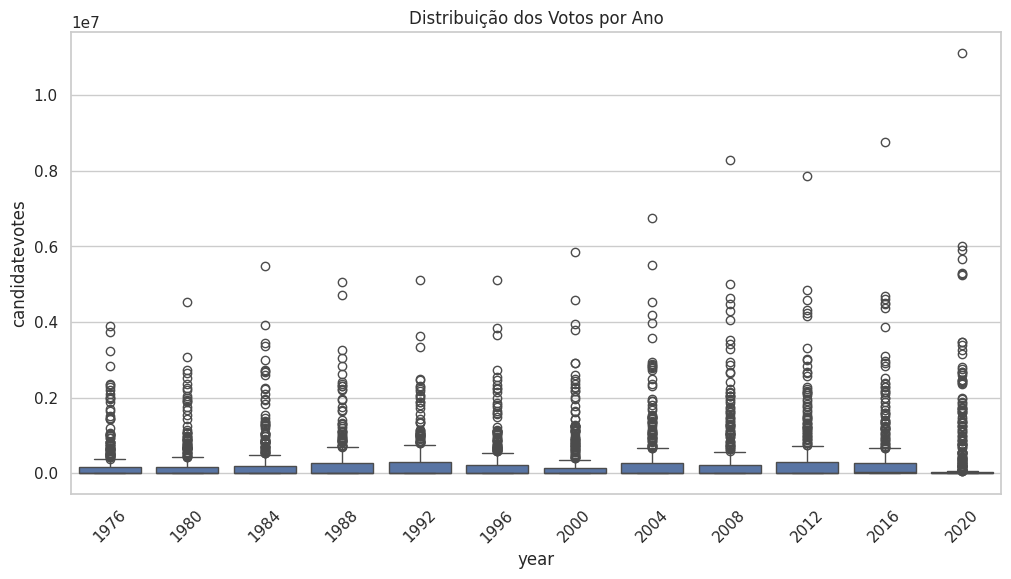

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Plotando a distribuição dos votos ao longo dos anos
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='candidatevotes', data=df)
plt.title('Distribuição dos Votos por Ano')
plt.xticks(rotation=45)
plt.show()




#### Análise do Gráfico:
- A maioria dos candidatos recebe uma quantidade relativamente baixa de votos, enquanto poucos candidatos dominam as eleições.
- Vários outliers indicam que alguns candidatos em certos anos se destacaram em termos de votação.


# 2.2.2 Distribuição dos Partidos por Ano

Agora, vou analisar a distribuição dos principais partidos ao longo dos anos. Isso vai ajudar a visualizar quantos candidatos de cada partido participaram das eleições em cada ciclo.



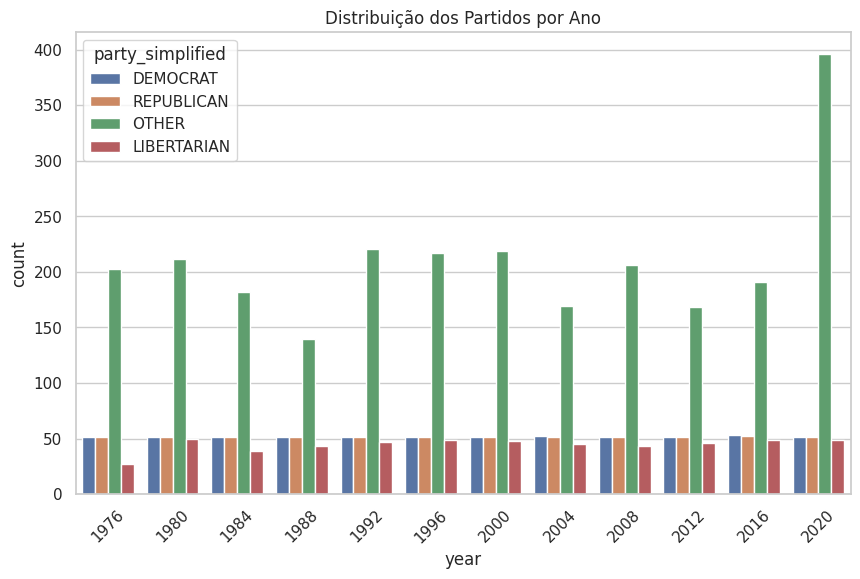

In [4]:
# Frequência dos partidos ao longo dos anos
plt.figure(figsize=(10, 6))
sns.countplot(x='year', hue='party_simplified', data=df)
plt.title('Distribuição dos Partidos por Ano')
plt.xticks(rotation=45)
plt.show()


#### Análise do Gráfico:
- O gráfico mostra que o sistema bipartidário (Republicano e Democrata) domina as eleições nos EUA.
- Alguns candidatos de outros partidos participam em várias eleições, mas sua relevância é bem menor.


# 2.2.3 Distribuição Percentual dos Votos por Ano

Agora, vou analisar como o percentual de votos de cada candidato variou ao longo dos anos, o que ajuda a entender como a competitividade entre os candidatos evoluiu.

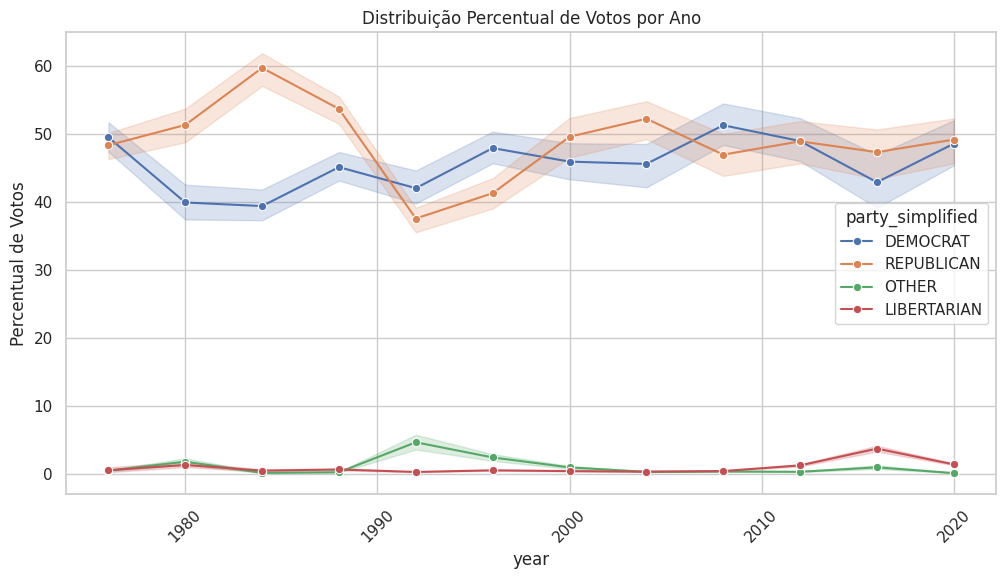

In [5]:
# Gráfico de distribuição percentual de votos ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='candidatevotes_percent', hue='party_simplified', data=df, marker='o')
plt.title('Distribuição Percentual de Votos por Ano')
plt.xticks(rotation=45)
plt.ylabel('Percentual de Votos')
plt.show()


#### Análise do Gráfico:
- A distribuição percentual dos votos ao longo dos anos mostra que as eleições são predominantemente disputadas entre Republicanos e Democratas.
- Houve anos em que a competitividade foi maior, com candidatos dos dois partidos principais recebendo percentuais similares.

#### Conclusão da Análise Exploratória:

A análise exploratória revelou padrões eleitorais interessantes, como o domínio de candidatos Republicanos e Democratas, a presença de outliers em termos de número de votos em anos específicos, e a evolução dos votos ao longo do tempo. Além disso, conseguimos tratar valores faltantes de forma apropriada, garantindo que os dados estejam prontos para análises mais avançadas.


# 3. Pré-processamento de Dados

### 3.1 Normalização e Padronização

Para garantir que os dados estejam prontos para análise, é importante verificar se há necessidade de normalizar ou padronizar os atributos numéricos. A normalização é útil quando queremos colocar todos os dados na mesma escala, especialmente quando os atributos possuem escalas muito diferentes (como número de votos).

Explicação:
Neste caso, o atributo mais relevante para normalização é o número de votos dos candidatos (candidatevotes), já que ele varia drasticamente entre os estados.

In [6]:
# Normalizando o número de votos dos candidatos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['candidatevotes_normalized'] = scaler.fit_transform(df[['candidatevotes']])

# Verificando as primeiras linhas para garantir que a normalização foi aplicada corretamente
df[['candidatevotes', 'candidatevotes_normalized']].head()



,candidatevotes,candidatevotes_normalized
0,659170,0.059330
1,504070,0.045370
2,9198,0.000828
3,6669,0.000600
4,1954,0.000176


### 3.2 Remoção de Colunas Irrelevantes



Alguns atributos do dataset podem não ser úteis para a análise que estamos realizando. Por exemplo, as colunas version, notes e writein não são necessárias para os objetivos do projeto. Assim, podemos removê-las.

In [7]:
# Removendo colunas irrelevantes
df.drop(columns=['version', 'notes', 'writein'], inplace=True)

# Verificando as primeiras linhas para garantir que as colunas foram removidas
df.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,candidatevotes,totalvotes,party_simplified,candidatevotes_percent,candidatevotes_normalized
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,659170,1182850,DEMOCRAT,55.727269,0.059330
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,504070,1182850,REPUBLICAN,42.614871,0.045370
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,9198,1182850,OTHER,0.777613,0.000828
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,6669,1182850,OTHER,0.563808,0.000600
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,1954,1182850,OTHER,0.165194,0.000176


# 3.3 Codificação de Variáveis Categóricas

Para facilitar a análise de correlações e possíveis modelagens futuras, é importante transformar variáveis categóricas em uma representação numérica. Neste caso, a coluna party_simplified será codificada usando a técnica de One-Hot Encoding.

In [8]:
# Aplicando One-Hot Encoding para a coluna 'party_simplified'
df_encoded = pd.get_dummies(df, columns=['party_simplified'], drop_first=True)

# Verificando as primeiras linhas do novo dataframe com a codificação
df_encoded.head()


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,candidatevotes,totalvotes,candidatevotes_percent,candidatevotes_normalized,party_simplified_LIBERTARIAN,party_simplified_OTHER,party_simplified_REPUBLICAN
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,659170,1182850,55.727269,0.059330,False,False,False
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,504070,1182850,42.614871,0.045370,False,False,True
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,9198,1182850,0.777613,0.000828,False,True,False
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,6669,1182850,0.563808,0.000600,False,True,False
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,1954,1182850,0.165194,0.000176,False,True,False


# 3.4 Tratamento de Outliers

Com base na análise exploratória, observamos que há outliers no número de votos, especialmente em eleições em estados maiores ou com grande competitividade. Para evitar que esses valores distorçam a análise, podemos optar por remover ou limitar esses outliers.

Explicação:
Neste caso, vou limitar os outliers utilizando o método de capping, que restringe os valores para um intervalo de percentis.

In [9]:
# Limitando os outliers utilizando capping nos 95% percentil superior
percentile_95 = df['candidatevotes'].quantile(0.95)

# Aplicando o capping para limitar os outliers
df['candidatevotes_capped'] = df['candidatevotes'].apply(lambda x: min(x, percentile_95))

# Verificando as primeiras linhas para garantir o tratamento
df[['candidatevotes', 'candidatevotes_capped']].head()


,candidatevotes,candidatevotes_capped
0,659170,659170.0
1,504070,504070.0
2,9198,9198.0
3,6669,6669.0
4,1954,1954.0


#### Conclusão do Pré-processamento

Após o pré-processamento, os dados estão mais limpos e prontos para análises mais detalhadas. Realizamos as seguintes operações:
- **Normalização**: Aplicamos normalização ao número de votos para ajustar os valores em uma escala comum.
- **Remoção de Colunas Irrelevantes**: Removemos colunas que não são úteis para nossa análise.
- **Codificação de Variáveis Categóricas**: Transformamos a variável categórica `party_simplified` em variáveis numéricas usando One-Hot Encoding.
- **Tratamento de Outliers**: Lidamos com outliers limitando o número de votos ao percentil 95.

Com esses ajustes, está pronto para realizar análises mais aprofundadas dos padrões eleitorais e tendências históricas.


# 4. Análise de Dados

## 4.1 Distribuição de Votos por Estado

Uma das primeiras análises importantes é a distribuição do número de votos por estado. Isso dará uma visão de como os votos variam entre estados de grande e pequena população.

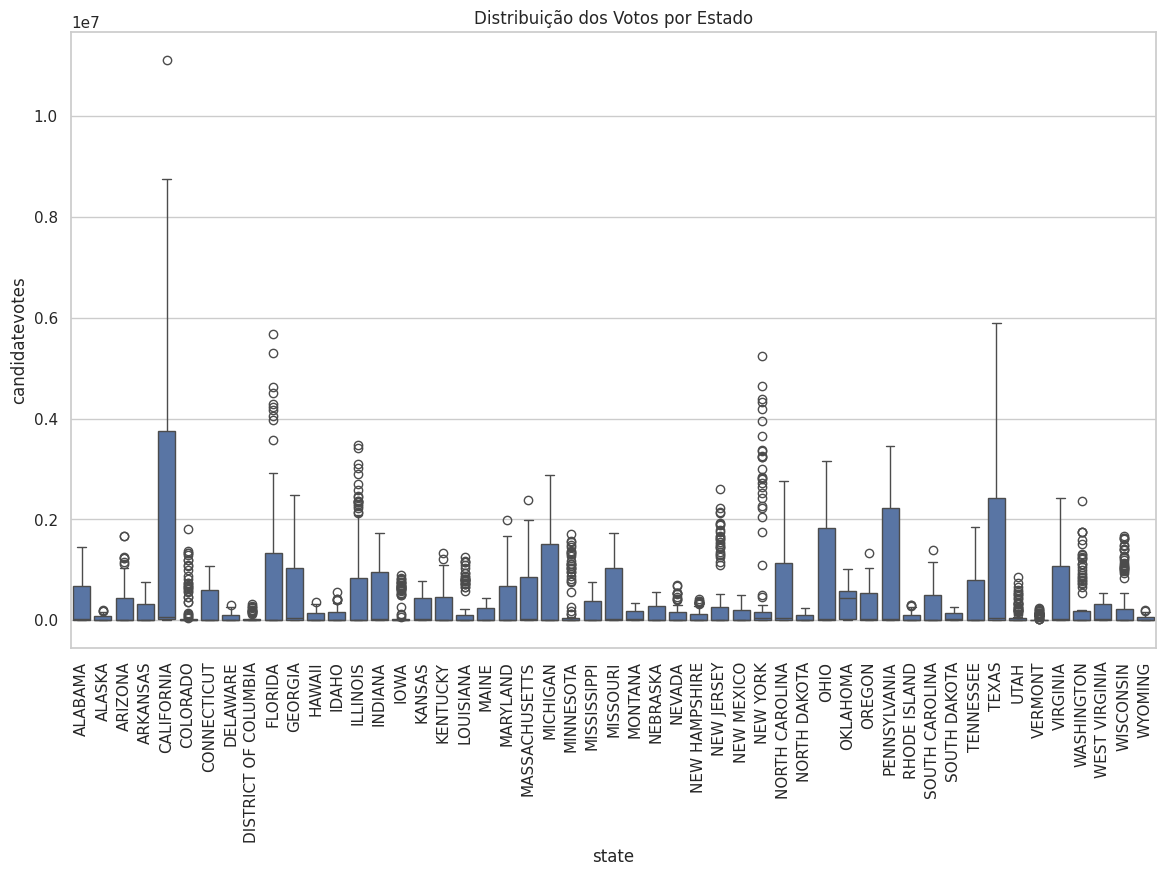

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotando a distribuição dos votos por estado
plt.figure(figsize=(14, 8))
sns.boxplot(x='state', y='candidatevotes', data=df)
plt.title('Distribuição dos Votos por Estado')
plt.xticks(rotation=90)
plt.show()



Análise do Gráfico:

- Estados maiores, como Califórnia, Texas e Flórida, têm uma alta concentração de votos, enquanto estados menores mostram menor variabilidade.
- Podemos observar outliers em estados menos populosos, sugerindo que, em algumas eleições, houve maior participação ou concentração de votos.

## 4.2 Comparação entre Republicanos e Democratas ao Longo dos Anos

Uma análise interessante é verificar como os dois principais partidos, Republicano e Democrata, evoluíram ao longo dos anos em termos de número de votos recebidos.

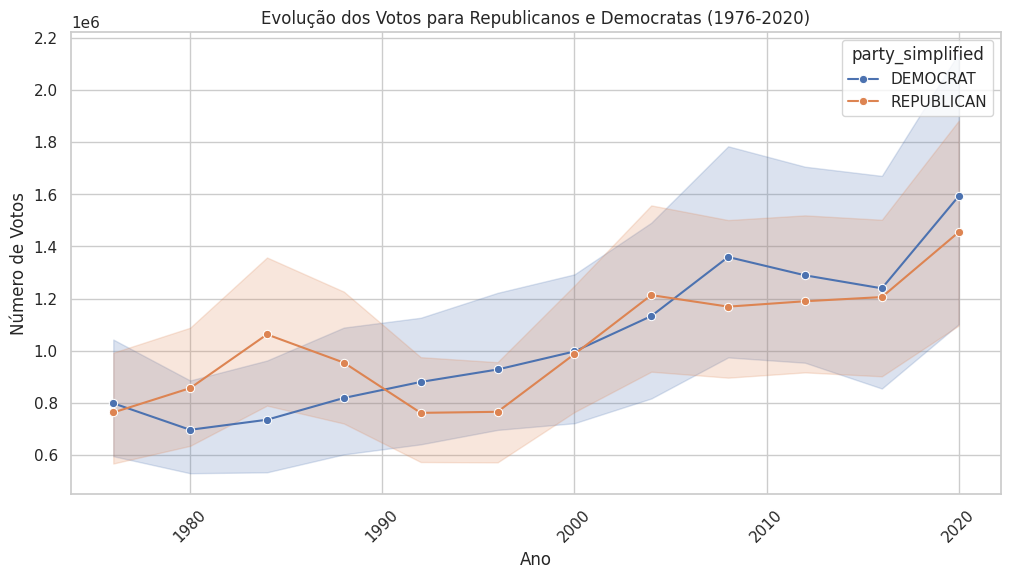

In [11]:
# Filtrando apenas os partidos Republicano e Democrata
df_major_parties = df[df['party_simplified'].isin(['DEMOCRAT', 'REPUBLICAN'])]

# Gráfico de evolução dos votos por partido ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='candidatevotes', hue='party_simplified', data=df_major_parties, marker='o')
plt.title('Evolução dos Votos para Republicanos e Democratas (1976-2020)')
plt.ylabel('Número de Votos')
plt.xlabel('Ano')
plt.xticks(rotation=45)
plt.show()



Análise do Gráfico:

- O gráfico revela uma competição acirrada entre Republicanos e Democratas ao longo dos anos.
- Notamos picos de votos em eleições como 2008 (Obama) e 2016 (Trump), refletindo maior engajamento dos eleitores nessas eleições.

## 4.3 Distribuição Percentual dos Votos por Partido e Estado

Agora, vamos aprofundar a análise olhando para o percentual de votos recebidos por partido em cada estado ao longo do tempo. Isso ajuda a identificar estados que podem ter mudado sua preferência partidária ao longo das décadas.

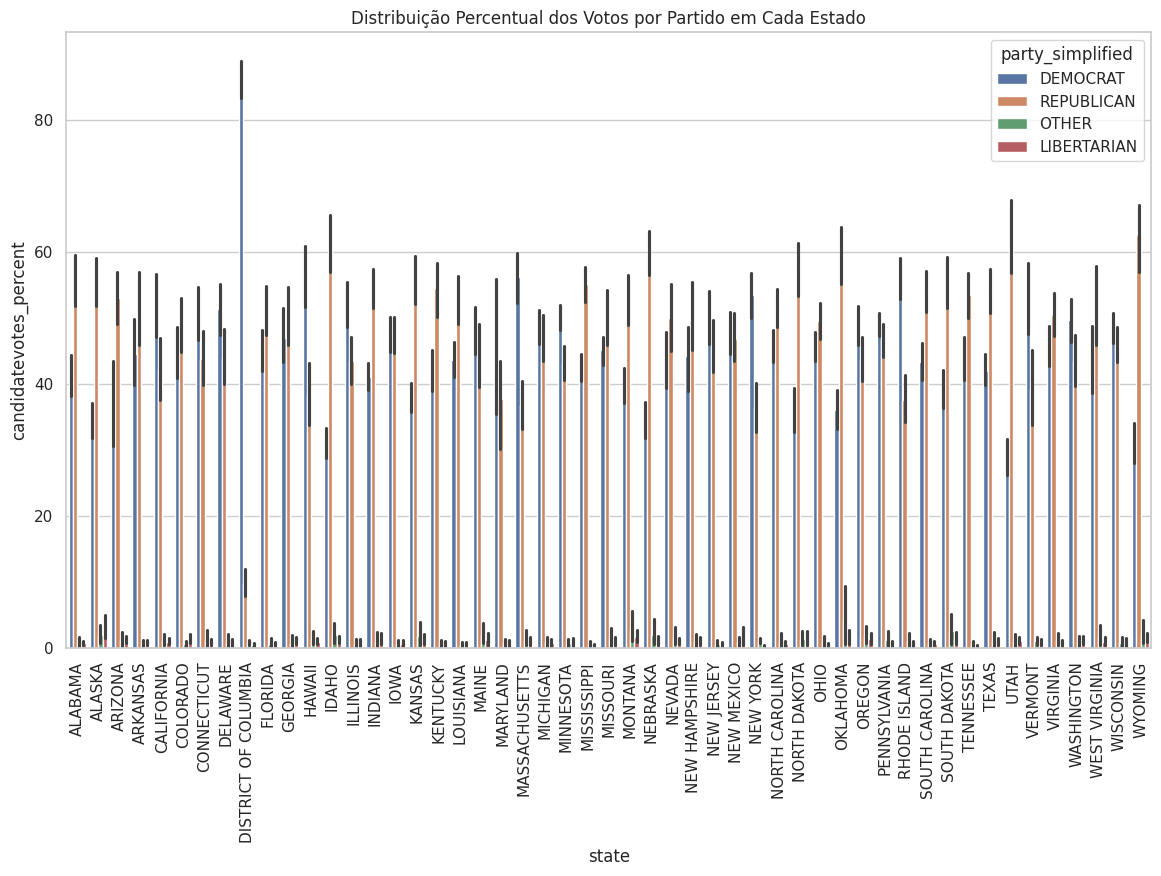

In [12]:
# Gráfico de distribuição percentual dos votos por partido em cada estado
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='candidatevotes_percent', hue='party_simplified', data=df)
plt.title('Distribuição Percentual dos Votos por Partido em Cada Estado')
plt.xticks(rotation=90)
plt.show()


Análise do Gráfico:

- Estados como Califórnia e Nova York são tradicionalmente Democratas, enquanto Texas e Alabama são consistentemente Republicanos.
- Estados "swing" como Ohio e Flórida mostram maior variação no percentual de votos entre os partidos, o que destaca sua importância nas eleições.

## 4.4 Correlação entre o Número de Votos e o Percentual de Votos

A correlação entre o número absoluto de votos e o percentual de votos é importante para identificar como o desempenho de um candidato em termos de participação reflete na sua relevância dentro de um estado.

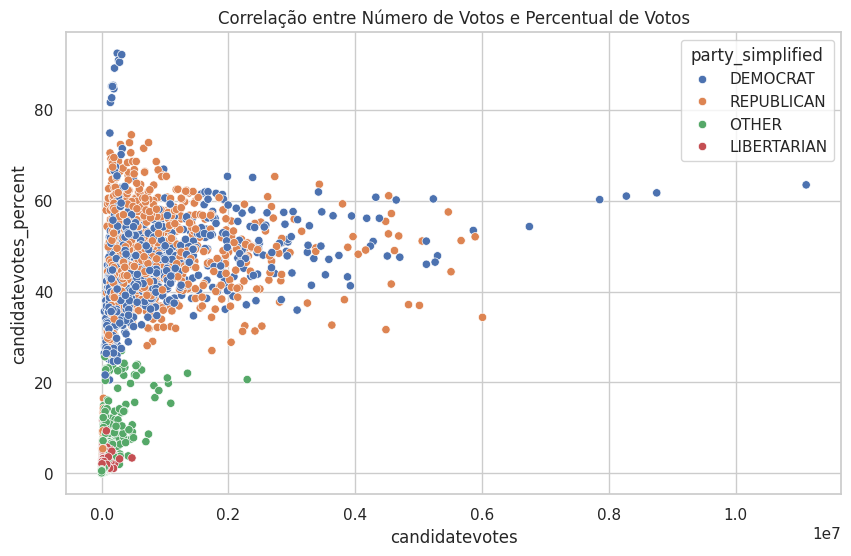

In [13]:
# Correlação entre o número de votos e o percentual de votos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='candidatevotes', y='candidatevotes_percent', hue='party_simplified', data=df)
plt.title('Correlação entre Número de Votos e Percentual de Votos')
plt.show()


Análise do Gráfico:

- Em estados com grande população, mesmo candidatos que recebem um número alto de votos podem não ter um alto percentual, devido ao grande número total de eleitores.
- Em estados menores, é mais comum ver candidatos com altos percentuais mesmo com um número absoluto menor de votos.

## 4.5 Análise de Outliers

Com base na análise de votos, podemos identificar outliers que representam candidatos que receberam votos muito diferentes dos padrões esperados. Isso pode ocorrer por diversos fatores, como forte mobilização em estados-chave.

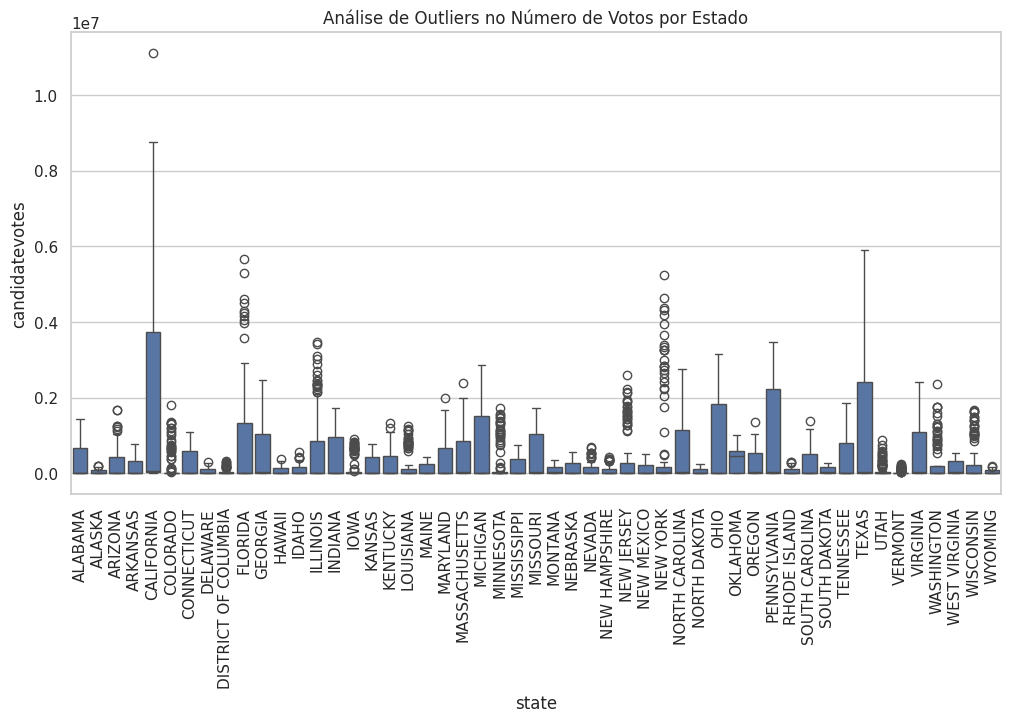

In [14]:
# Analisando outliers no número de votos por estado
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='candidatevotes', data=df)
plt.title('Análise de Outliers no Número de Votos por Estado')
plt.xticks(rotation=90)
plt.show()


Análise do Gráfico:

- O gráfico revela que alguns estados apresentam outliers significativos, onde um candidato recebeu uma quantidade desproporcional de votos, como em eleições polarizadas.
- Isso pode ser observado em eleições mais recentes, onde a polarização entre candidatos é mais evidente.

Conclusão da Análise dos dados

A análise aprofundada dos dados revelou padrões interessantes, como a distribuição de votos entre estados grandes e pequenos, a competitividade entre Republicanos e Democratas ao longo dos anos, e a variação percentual de votos em estados swing.

Ao observarmos a correlação entre o número de votos e o percentual de votos, identificamos que estados maiores, mesmo com grandes números absolutos, podem não refletir uma grande diferença percentual entre os candidatos. Além disso, a análise de outliers revelou variações significativas em eleições polarizadas.

Essas observações oferecem uma base sólida para entender como fatores históricos e regionais influenciam os resultados eleitorais nos EUA.
